In [1]:
 import pandas as pd

In [2]:
datos={
      "nombre":[
          "Javier","Alejandro","Flores","Ana",
          "Pedro","Jose","Antonio","Valeria"
      ],

"saldo":[
          5454258,6464,5454,1000,
          5454582,64624,54254,12000,
      ],
       "paises":[
  "Jamaica","Alemania","Finlandia","Albania",
   "Jamaica","Alemania","Finlandia","Albania",
      ],

}
datos

{'nombre': ['Javier',
  'Alejandro',
  'Flores',
  'Ana',
  'Pedro',
  'Jose',
  'Antonio',
  'Valeria'],
 'saldo': [5454258, 6464, 5454, 1000, 5454582, 64624, 54254, 12000],
 'paises': ['Jamaica',
  'Alemania',
  'Finlandia',
  'Albania',
  'Jamaica',
  'Alemania',
  'Finlandia',
  'Albania']}

In [3]:
datos = pd.DataFrame(datos)

In [4]:
datos.paises

0      Jamaica
1     Alemania
2    Finlandia
3      Albania
4      Jamaica
5     Alemania
6    Finlandia
7      Albania
Name: paises, dtype: object

In [5]:
datos['paises']=datos['paises'].astype("category")
print(datos['paises'])

0      Jamaica
1     Alemania
2    Finlandia
3      Albania
4      Jamaica
5     Alemania
6    Finlandia
7      Albania
Name: paises, dtype: category
Categories (4, object): ['Albania', 'Alemania', 'Finlandia', 'Jamaica']




Mala pero mas facil de hacer las cosas



In [6]:
datos_mal=datos.copy()

In [9]:
remplazos={

           "Jamaica":1,
           "Alemania":2,
          "Finlandia":3,
          "Albania":4}
#https://colab.research.google.com/drive/1sunInlLLFtAn-xppGr7P4Q9M2c1YnsC6?usp=sharing

In [10]:
datos_mal['paises'].replace(remplazos,inplace=True)
datos_mal

,nombre,saldo,paises
0,Javier,5454258,1
1,Alejandro,6464,2
2,Flores,5454,3
3,Ana,1000,4
4,Pedro,5454582,1
5,Jose,64624,2
6,Antonio,54254,3
7,Valeria,12000,4


In [11]:
datos_bien=datos.copy()

In [12]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

codificador= OneHotEncoder()
codificacion = codificador.fit_transform(datos[["paises"]])

nuevas_cols = pd.DataFrame(codificacion.toarray(),
                           columns=codificador.categories_)

nuevas_cols


,Albania,Alemania,Finlandia,Jamaica
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0
5,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,0.0


In [13]:
datos_bien=pd.concat([datos,nuevas_cols],axis="columns")

In [14]:
datos_bien.columns

Index([      'nombre',        'saldo',       'paises',   ('Albania',),
        ('Alemania',), ('Finlandia',),   ('Jamaica',)],
      dtype='object')

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [16]:
datos= pd.read_csv("https://gist.githubusercontent.com/javierIA/f2767d680aaaee5d21f37ae623773925/raw/d6a2241f93b4aad80ba3985a835bbd30546a9dc1/raw.githubusercontent.com_CodigoMaquina_code_main_datos_datos_personas.csv")

In [17]:
datos

,ingreso,carros
0,22273.577534,3
1,8961.047249,1
2,7437.977263,2
3,12064.915290,2
4,9296.396167,1
...,...,...
995,9998.522402,0
996,6867.097603,2
997,9757.539280,1
998,11044.031510,1


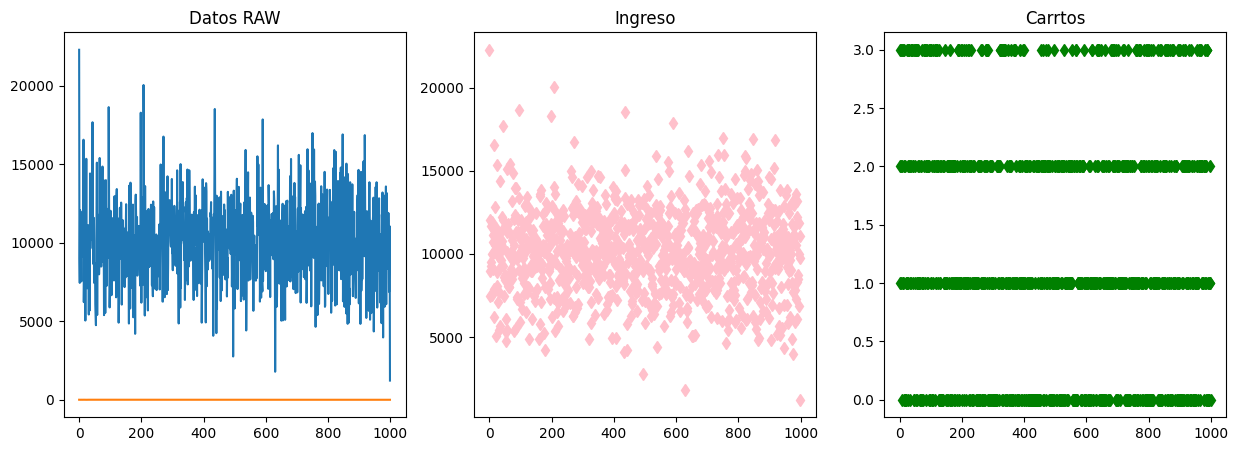

In [18]:
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
ax1.set_title("Datos RAW")
ax2.set_title("Ingreso")
ax3.set_title("Carrtos")
ax1.plot(datos)
ax2.plot(datos['ingreso'],linewidth=0,marker="d",color="pink")
ax3.plot(datos['carros'],linewidth=0,marker="d",color="green")

In [19]:
from sklearn import preprocessing

datos_sin_max= preprocessing.MinMaxScaler().fit_transform(datos)
datos_sin_max

array([[1.        , 1.        ],
       [0.36761553, 0.33333333],
       [0.29526521, 0.66666667],
       ...,
       [0.40545125, 0.33333333],
       [0.46656343, 0.33333333],
       [0.        , 0.        ]])

In [20]:
datos_normalizaer=preprocessing.Normalizer().transform(datos.T)
datos_normalizaer=datos_normalizaer.T
datos_normalizaer

array([[0.06777903, 0.05886881],
       [0.02726868, 0.01962294],
       [0.02263394, 0.03924588],
       ...,
       [0.02969242, 0.01962294],
       [0.03360725, 0.01962294],
       [0.00371935, 0.        ]])

In [21]:
datos_std=preprocessing.StandardScaler().fit_transform(datos)
datos_std

array([[ 4.81555174,  1.70892042],
       [-0.4413019 , -0.23193185],
       [-1.04273197,  0.73849429],
       ...,
       [-0.12678303, -0.23193185],
       [ 0.38122719, -0.23193185],
       [-3.49719763, -1.20235798]])

In [22]:
datos_sin_max=pd.DataFrame(datos_sin_max,columns=["ingreso","carros"])
datos_normalizaer=pd.DataFrame(datos_normalizaer,columns=["ingreso","carros"])
datos_std=pd.DataFrame(datos_std,columns=["ingreso","carros"])

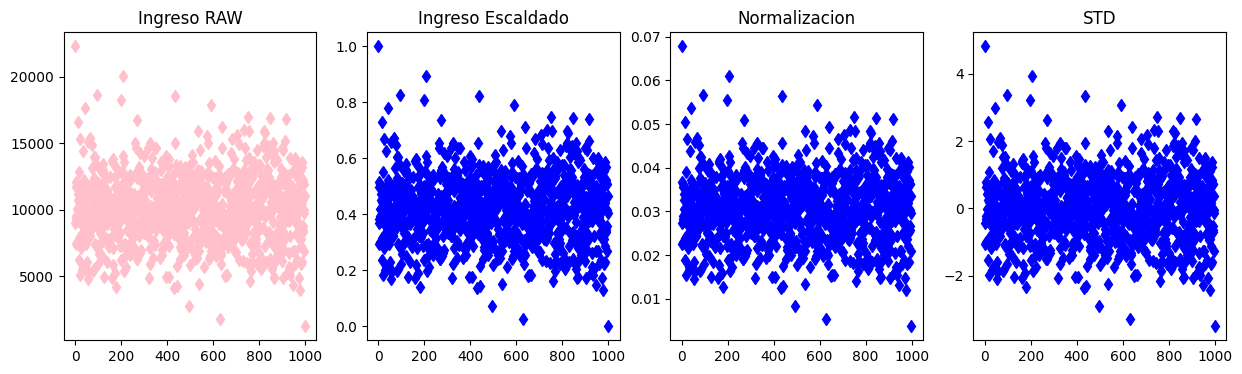

In [23]:
fig=plt.figure(figsize=(15,4))
ax1=fig.add_subplot(1,4,1)
ax2=fig.add_subplot(1,4,2)
ax3=fig.add_subplot(1,4,3)
ax4=fig.add_subplot(1,4,4)
ax1.set_title("Ingreso RAW")
ax2.set_title("Ingreso Escaldado")
ax3.set_title("Normalizacion")
ax4.set_title("STD")

ax1.plot(datos['ingreso'],linewidth=0,marker="d",color="pink")
ax2.plot(datos_sin_max['ingreso'],linewidth=0,marker="d",color="blue")
ax3.plot(datos_normalizaer['ingreso'],linewidth=0,marker="d",color="blue")
ax4.plot(datos_std['ingreso'],linewidth=0,marker="d",color="blue")
